> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, run the following cell:

> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`
 
> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View > Cell Toolbar > None`.

<img src="../images/shell-logo.png" width="50" height="50" align="right"/>

<img src="../images/di.png" width="50" height="50" align="right"/>

# Data Encoding & Class Imabalance

In [2]:
# ! jupyter nbconvert Python_intro.ipynb --to slides --post serve

## Learning Objectives
*In this lesson, we will go over the following:*

- What is Data Encoding ? Why is it required ?
- What is Class Imbalance
- Handling Class Imabalance

In [6]:
# !pip install skimpy

-------------------------------------------
# Introduction

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/one-hot-vs-label-encoder.png)

Picture Credit: https://cdn.analyticsvidhya.com

Since categorical variables cannot be used for analysis as they are in many machine learning models, they must be converted into a suitable form for each model. In addition to representing a variable as a string, it should be treated as a categorical type when the size or order of the values is meaningless even if it is a number in terms of data.

In this notebook, we examine ways to encode these categorical categories.


-----------------------------
# Setting Up
First Let's load the libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from skimpy import skim
import matplotlib.pyplot as plt

In [8]:
train_org = pd.read_csv('../data/train.csv')
train = train_org[['product','age','target']]
train_x = train.drop(['target'], axis=1)
train_y = train['target']
test_x = pd.read_csv('../data/test.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  10000 non-null  object
 1   age      10000 non-null  int64 
 2   target   10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In the train data frame, the data type of the 'product' feature is object. Let's encode this feature in various ways.

In [11]:
skim(train)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10000  │ │ int64       │ 2     │                                    │
│ │ Number of columns │ 3      │ │ object      │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃         ┃ missing  ┃ complete rate  ┃ mean  ┃ sd    ┃ p0 ┃ p25 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ age     │        0 │              1 │    42 │    22 │  5 │  23 │  61 │   79 │ █▇▇█▇█ │  │
│ │ target  │        0 │              1 │  0.19 │  0.39 │  0 │   0 │   0 │    1 │ █    ▂ │  │
│ └─────────┴──────────┴────────────────┴───────┴───────┴────┴─────┴─────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

Text(0.5, 1.02, 'Orginal Label for product column')

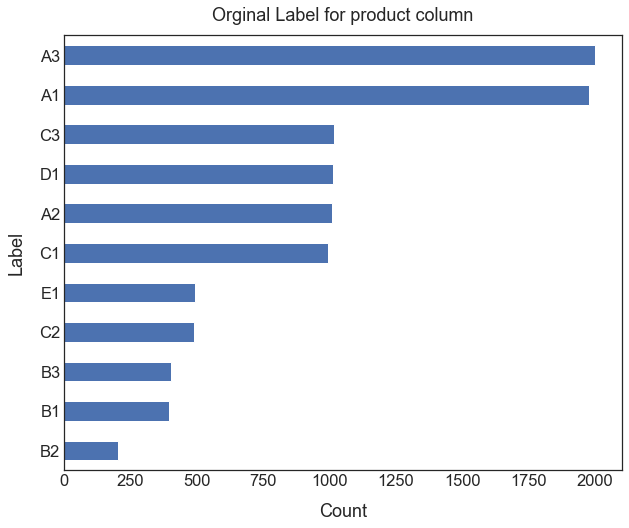

In [12]:
sns.set(font_scale=1.5)
plt.style.use('seaborn-white')
train_x['product'].value_counts().sort_values().plot(kind='barh',figsize=(10, 8))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Label", labelpad=14)
plt.title("Orginal Label for product column", y=1.02)

In [13]:
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()


def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x

cat_cols = ['product']
train.loc[:,'product'].unique()

array(['D1', 'A1', 'A3', 'B1', 'A2', 'C2', 'C1', 'B2', 'E1', 'C3', 'B3'],
      dtype=object)

---------------------------------------------------------
### One-hot encoding

![](https://miro.medium.com/max/1400/1*80tflY8LxDFRmkD16u25RQ.png)
Picture credit: https://miro.medium.com

One-Hot encoding is a vector representation method of words in which the size of a word set is the dimension of a vector, a value of 1 is assigned to the index of the word to be expressed, and 0 is assigned to other indices. A vector expressed in this way is called a one-hot vector.

One-hot encoding consists of two processes.
1. Give each word a unique index. (integer encoding)
2. Give 1 to the index position of the word you want to express, and 0 to the index position of other words.

On the other hand, when there are n levels of categorical variables, multicollinearity occurs when the number of dummy variables are created as many as the number of levels. To prevent this, a method of creating n-1 dummy variables can be used.


**Multicollinearity:**
> In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation, the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

Ref: https://en.wikipedia.org/wiki

### Using sklearn OneHotEncoder

In OneHotEncoder class, the return value of the transform method is returned as a numpy array, so the original column name and level information are lost. So it's a bit tricky to deal with as you have to return it back to the dataframe when concatenating it. On the other hand, since a sparse matrix is ​​returned by specifying the sparse parameter value as True, memory can be saved when one-hot encoding of categorical variables with multiple levels is performed.

In [9]:
train_x, test_x = load_data()

from sklearn.preprocessing import OneHotEncoder

# Encoding by OneHotEncoder
ohe = OneHotEncoder(sparse=False, categories='auto')
ohe.fit(train_x[cat_cols])

# Create column names
columns = []
for i, c in enumerate(cat_cols):
    columns += [f'{c}_{v}' for v in ohe.categories_[i]]

print(columns)
# Convert the created dummy variable to a data frame
dummy_vals_train = pd.DataFrame(ohe.transform(train_x[cat_cols]), columns=columns)
dummy_vals_test = pd.DataFrame(ohe.transform(test_x[cat_cols]), columns=columns)

# Combine with the rest of the variables
train_x = pd.concat([train_x.drop(cat_cols, axis=1), dummy_vals_train], axis=1)
test_x = pd.concat([test_x.drop(cat_cols, axis=1), dummy_vals_test], axis=1)

['product_A1', 'product_A2', 'product_A3', 'product_B1', 'product_B2', 'product_B3', 'product_C1', 'product_C2', 'product_C3', 'product_D1', 'product_E1']


In [10]:
skim(train_x)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10000  │ │ float64     │ 11    │                                    │
│ │ Number of columns │ 12     │ │ int64       │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃            ┃ missing ┃ complete   ┃ mean  ┃ sd   ┃ p0  ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┃            ┃         ┃ rate       ┃       ┃      ┃     ┃      ┃      ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ age        │ 0.0     │ 1.0        │ 42.0  │ 22.0 │ 5.0 │ 23.0 │ 61.0 │ 79.0 │ █▇▇█▇█ │  │
│ │ product_A1 │ 0.0     │ 1.0        │ 0.2   │ 0.4  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▂ │  │
│ │ product_A2 │ 0.0     │ 1.0        │ 0.1   │ 0.3  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▁ │  │
│ │ product_A3 │ 0.0     │ 1.0        │ 0.2   │ 0.4  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▂ │  │
│ │ product_B1 │ 0.0     │ 1.0        │ 0.04  │ 0.19 │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █      │  │
│ │ product_B2 │ 0.0     │ 1.0        │ 0.02  │ 0.14 │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █      │  │
│ │ product_B3 │ 0.0     │ 1.0        │ 0.04  │ 0.2  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █      │  │
│ │ product_C1 │ 0.0     │ 1.0        │ 0.1   │ 0.3  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▁ │  │
│ │ product_C2 │ 0.0     │ 1.0        │ 0.049 │ 0.22 │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █      │  │
│ │ product_C3 │ 0.0     │ 1.0        │ 0.1   │ 0.3  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▁ │  │
│ │ product_D1 │ 0.0     │ 1.0        │ 0.1   │ 0.3  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▁ │  │
│ │ product_E1 │ 0.0     │ 1.0        │ 0.049 │ 0.22 │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █      │  │
│ └────────────┴─────────┴────────────┴───────┴──────┴─────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [11]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

train_x.iloc[:,1:].astype(int).head().style.apply(highlight_max, props='color:Black;background-color:Yellow', axis=1)

,product_A1,product_A2,product_A3,product_B1,product_B2,product_B3,product_C1,product_C2,product_C3,product_D1,product_E1
0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


As above, after encoding, you can see that the new columns increase as much as the number of levels of the product feature. Also, it can be seen that only the corresponding column is set to 1 in the level.

### Using Pandas get_dummies

All columns specified in the parameter columns are one-hot encoded, and a dataframe combined with the remaining unconverted columns is returned. This function is convenient because it automatically creates a new column name using the original column name and the label name of the categorical variable and returns a dataframe.

In [12]:
train_x, test_x = load_data()

test_x = test_x.loc[:,['product','age']]

combined = pd.concat([train_x,test_x])
combined = pd.get_dummies(combined,columns=cat_cols)

#respliting train and test dataset
train_x = combined.iloc[:train_x.shape[0],:].reset_index(drop=True)
test_X = combined.iloc[train_x.shape[0]:,:].reset_index(drop=True)

In [13]:
skim(train_x)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10000  │ │ uint8       │ 11    │                                    │
│ │ Number of columns │ 12     │ │ int64       │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃            ┃ missing ┃ complete   ┃ mean  ┃ sd   ┃ p0  ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┃            ┃         ┃ rate       ┃       ┃      ┃     ┃      ┃      ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ age        │ 0.0     │ 1.0        │ 42.0  │ 22.0 │ 5.0 │ 23.0 │ 61.0 │ 79.0 │ █▇▇█▇█ │  │
│ │ product_A1 │ 0.0     │ 1.0        │ 0.2   │ 0.4  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▂ │  │
│ │ product_A2 │ 0.0     │ 1.0        │ 0.1   │ 0.3  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▁ │  │
│ │ product_A3 │ 0.0     │ 1.0        │ 0.2   │ 0.4  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▂ │  │
│ │ product_B1 │ 0.0     │ 1.0        │ 0.04  │ 0.19 │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █      │  │
│ │ product_B2 │ 0.0     │ 1.0        │ 0.02  │ 0.14 │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █      │  │
│ │ product_B3 │ 0.0     │ 1.0        │ 0.04  │ 0.2  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █      │  │
│ │ product_C1 │ 0.0     │ 1.0        │ 0.1   │ 0.3  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▁ │  │
│ │ product_C2 │ 0.0     │ 1.0        │ 0.049 │ 0.22 │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █      │  │
│ │ product_C3 │ 0.0     │ 1.0        │ 0.1   │ 0.3  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▁ │  │
│ │ product_D1 │ 0.0     │ 1.0        │ 0.1   │ 0.3  │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █    ▁ │  │
│ │ product_E1 │ 0.0     │ 1.0        │ 0.049 │ 0.22 │ 0.0 │ 0.0  │ 0.0  │ 1.0  │ █      │  │
│ └────────────┴─────────┴────────────┴───────┴──────┴─────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [14]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

train_x.iloc[:,1:].astype(int).head().style.apply(highlight_max, props='color:Black;background-color:Yellow', axis=1)

,product_A1,product_A2,product_A3,product_B1,product_B2,product_B3,product_C1,product_C2,product_C3,product_D1,product_E1
0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


-----------------------------------------------------------
### Label encoding

![](https://miro.medium.com/max/386/1*Yp6r7m82IoSnnZDPpDpYNw.png)
Picture Credit: https://miro.medium.com

Label encoding simply converts a string to a numeric categorical value. However, there is a problem that these numbers exist in the order of largest and smallest. Because of these characteristics, label encoding should not be applied to machine learning algorithms such as linear regression. Tree-like machine learning algorithms do not have a problem because they do not reflect these characteristics of numbers.

In [15]:
train_x, test_x = load_data()

from sklearn.preprocessing import LabelEncoder

# Perform label encoding iteratively by looping a categorical variable
for c in cat_cols:
    # Transform data after defining based on training data
    le = LabelEncoder()
    le.fit(train_x[c])
    train_x[c] = le.transform(train_x[c])
    test_x[c] = le.transform(test_x[c])
    print("{0} = {1}".format(c,train_x[c].unique()))

product = [ 9  0  2  3  1  7  6  4 10  8  5]


Text(0.5, 1.02, 'LabelEncoder')

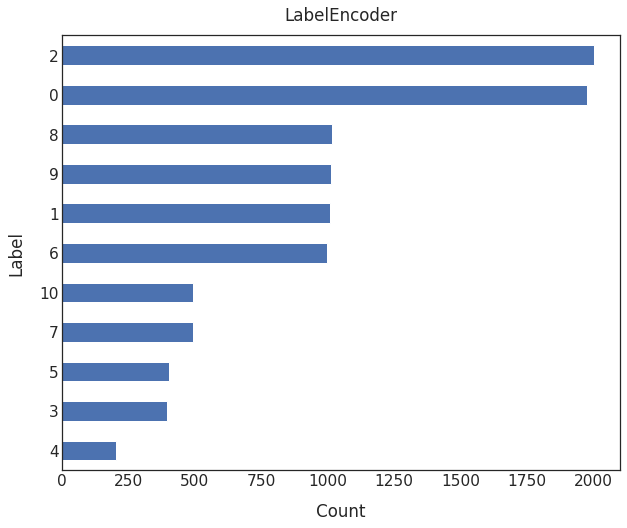

In [16]:
sns.set(font_scale=1.4)
plt.style.use('seaborn-white')
train_x['product'].value_counts().sort_values().plot(kind='barh',figsize=(10, 8))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Label", labelpad=14)
plt.title("LabelEncoder", y=1.02)

In [17]:
skim(train_x)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10000  │ │ int64       │ 2     │                                    │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                    │
│ └───────────────────┴────────┘                                                            │
│                                          number                                           │
│ ┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃          ┃ missing ┃ complete rate ┃ mean ┃ sd   ┃ p0  ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ product  │ 0.0     │ 1.0           │ 4.1  │ 3.4  │ 0.0 │ 1.0  │ 8.0  │ 10.0 │ █▆▁▄▄▄ │  │
│ │ age      │ 0.0     │ 1.0           │ 42.0 │ 22.0 │ 5.0 │ 23.0 │ 61.0 │ 79.0 │ █▇▇█▇█ │  │
│ └──────────┴─────────┴───────────────┴──────┴──────┴─────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [18]:
train_x['product'].head(10)

0    9
1    0
2    2
3    3
4    1
5    7
6    2
7    9
8    9
9    0
Name: product, dtype: int64

As above, a new column is not newly created, and the label encoding can be checked for each column level of the product.

------------------------------------------------
### Feature hashing

In one-hot encoding, the number of features becomes equal to the number of levels of categories when transformation is performed. Feature hashing, on the other hand, is a transformation that reduces the state of a category. The number of features after transformation is determined first, and the hash bucket is determined for each level using the hash function.
It can be used when the number of levels of categorical variables is large and the number of features generated by one-hot encoding is too large.

![](https://wush978.github.io/FeatureHashing/assets/img/hash.png)

Picture Credit: https://wush978.github.io

In [19]:
train_x, test_x = load_data()

from sklearn.feature_extraction import FeatureHasher
num_of_feature = 5
# Feature hashing iteratively on categorical variables
for c in cat_cols:
    fh = FeatureHasher(n_features=num_of_feature, input_type='string')

    # Convert variable to string and apply FeatureHasher
    hash_train = fh.transform(train_x[[c]].astype(str).values)
    hash_test = fh.transform(test_x[[c]].astype(str).values)

    # convert to dataframe
    hash_train = pd.DataFrame(hash_train.todense(), columns=[f'{c}_{i}' for i in range(num_of_feature)])
    hash_test = pd.DataFrame(hash_test.todense(), columns=[f'{c}_{i}' for i in range(num_of_feature)])
    
    print(c,"=>")
    print(hash_train.head())
    
    # Combine with original dataframe
    train_x = pd.concat([train_x, hash_train], axis=1)
    test_x = pd.concat([test_x, hash_test], axis=1)

# Delete the original categorical variable
train_x.drop(cat_cols, axis=1, inplace=True)
test_x.drop(cat_cols, axis=1, inplace=True)

product =>
   product_0  product_1  product_2  product_3  product_4
0        0.0        0.0       -1.0        0.0        0.0
1        0.0        0.0       -1.0        0.0        0.0
2        0.0        0.0       -1.0        0.0        0.0
3        0.0        0.0        0.0       -1.0        0.0
4        0.0        0.0        0.0        0.0       -1.0


In [20]:
skim(train_x)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10000  │ │ float64     │ 5     │                                    │
│ │ Number of columns │ 6      │ │ int64       │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃           ┃ missing ┃ complete  ┃ mean   ┃ sd   ┃ p0   ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┃           ┃         ┃ rate      ┃        ┃      ┃      ┃      ┃      ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ age       │ 0.0     │ 1.0       │ 42.0   │ 22.0 │ 5.0  │ 23.0 │ 61.0 │ 79.0 │ █▇▇█▇█ │  │
│ │ product_0 │ 0.0     │ 1.0       │ -0.049 │ 0.22 │ -1.0 │ 0.0  │ 0.0  │ 0.0  │      █ │  │
│ │ product_1 │ 0.0     │ 1.0       │ 0.1    │ 0.3  │ 0.0  │ 0.0  │ 0.0  │ 1.0  │ █    ▁ │  │
│ │ product_2 │ 0.0     │ 1.0       │ -0.6   │ 0.49 │ -1.0 │ -1.0 │ 0.0  │ 0.0  │ █    ▅ │  │
│ │ product_3 │ 0.0     │ 1.0       │ -0.06  │ 0.31 │ -1.0 │ 0.0  │ 0.0  │ 1.0  │ ▁  █   │  │
│ │ product_4 │ 0.0     │ 1.0       │ -0.052 │ 0.38 │ -1.0 │ 0.0  │ 0.0  │ 1.0  │ ▁  █   │  │
│ └───────────┴─────────┴───────────┴────────┴──────┴──────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [21]:
train_x.iloc[:,1:].head()

,product_0,product_1,product_2,product_3,product_4
0,0.0,0.0,-1.0,0.0,0.0
1,0.0,0.0,-1.0,0.0,0.0
2,0.0,0.0,-1.0,0.0,0.0
3,0.0,0.0,0.0,-1.0,0.0
4,0.0,0.0,0.0,0.0,-1.0


----------------------------------------------------------------------
### Frequency encoding

![](https://www.elastic.co/guide/en/machine-learning/current/images/frequency-encoding.jpg)

Picture Credit: https://www.elastic.co

Frequency encoding is a method of substituting a categorical variable with the number or frequency of appearance of each level. It is valid when there is a relationship between the frequency of appearance of each level and the target variable.
Also, as a variant of label encoding, it can be used to create an index that is listed in the order of appearance frequency rather than the index in alphabetical order.

In [22]:
train_x, test_x = load_data()

# Repeating the variable using the for statement to perform frequency encoding
for c in cat_cols:
    freq = train_x[c].value_counts()
    # Replaced by the number of occurrences of a category
    train_x[c] = train_x[c].map(freq)
    test_x[c] = test_x[c].map(freq)
    print(c,"=>")
    print('-'*60)
    print(train_x[c].unique())

product =>
------------------------------------------------------------
[1013 1977 2002  395 1010  491  996  202  494 1017  403]


Text(0.5, 1.02, 'FrequencyEncoder')

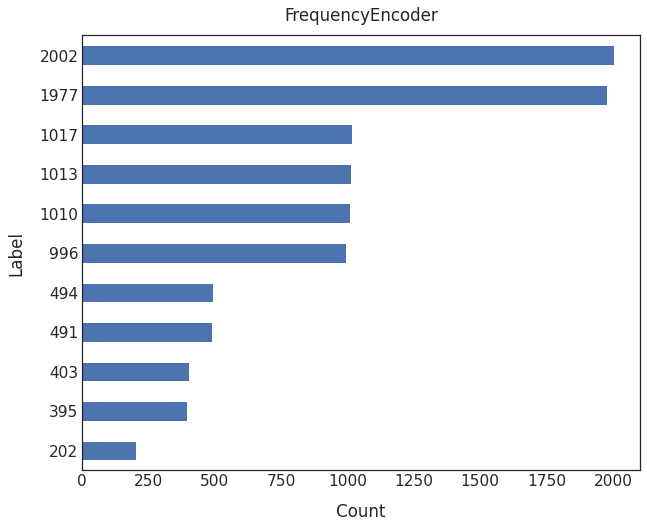

In [23]:
sns.set(font_scale=1.4)
plt.style.use('seaborn-white')
train_x['product'].value_counts().sort_values().plot(kind='barh',figsize=(10, 8))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Label", labelpad=14)
plt.title("FrequencyEncoder", y=1.02)

In [24]:
skim(train_x)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10000  │ │ int64       │ 2     │                                    │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                    │
│ └───────────────────┴────────┘                                                            │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┓  │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd    ┃ p0    ┃ p25    ┃ p75    ┃ p100   ┃ hist  ┃  │
│ ┃        ┃ g      ┃ te     ┃        ┃       ┃       ┃        ┃        ┃        ┃       ┃  │
│ ┃        ┃        ┃ rate   ┃        ┃       ┃       ┃        ┃        ┃        ┃       ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━┩  │
│ │ produc │ 0.0    │ 1.0    │ 1300.0 │ 610.0 │ 200.0 │ 1000.0 │ 2000.0 │ 2000.0 │ ▄ █   │  │
│ │ t      │        │        │        │       │       │        │        │        │ █     │  │
│ │ age    │ 0.0    │ 1.0    │ 42.0   │ 22.0  │ 5.0   │ 23.0   │ 61.0   │ 79.0   │ █▇▇█▇ │  │
│ │        │        │        │        │       │       │        │        │        │ █     │  │
│ └────────┴────────┴────────┴────────┴───────┴───────┴────────┴────────┴────────┴───────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [25]:
train_x.loc[:,'product'].head()

0    1013
1    1977
2    2002
3     395
4    1010
Name: product, dtype: int64

As above, it can be seen that encoding is performed with the frequency and number of appearances of each level.

------------------------------------------------
### Target Encoding

![](https://www.renom.jp/notebooks/tutorial/preprocessing/category_encoding/renom_cat_target.png)

Reference: https://miro.medium.com

# Target encoding (Version 1)

This is a method of converting a categorical variable into a numeric variable using a target variable. That is, the average value of the target variable in each level group of the categorical variable is aggregated and replaced with that value.

In [26]:
train_x, test_x = load_data()

from sklearn.model_selection import KFold

# Target encoding is performed by repeating the variable using the for statement.
for c in cat_cols:
    # Calculate the target mean for each category across the training data
    data_tmp = pd.DataFrame({c: train_x[c], 'target': train_y})
    target_mean = data_tmp.groupby(c)['target'].mean()

    # Change the category of test data
    test_x[c] = test_x[c].map(target_mean)

    # Prepare an array to store values after transforming the training data
    tmp = np.repeat(np.nan, train_x.shape[0])

    # Split training data
    kf = KFold(n_splits=4, shuffle=True, random_state=72)
    for idx_1, idx_2 in kf.split(train_x):
        # Calculate the mean of each categorical objective variable out of fold
        target_mean = data_tmp.iloc[idx_1].groupby(c)['target'].mean()
        # Store the converted value in the date array
        tmp[idx_2] = train_x[c].iloc[idx_2].map(target_mean)

    # Change the original variable to the data after conversion
    train_x[c] = tmp
    print(c,"=>")
    print('-'*60)
    print(train_x[c].unique())

product =>
------------------------------------------------------------
[0.33860343 0.14928425 0.15245131 0.19536424 0.19021739 0.21693122
 0.15892256 0.31498079 0.14256893 0.23055556 0.1768617  0.20645161
 0.1488498  0.15389696 0.22351421 0.212      0.18096515 0.21276596
 0.16643929 0.1664465  0.31955923 0.1460974  0.16513761 0.23636364
 0.1671159  0.15217391 0.33244681 0.23684211 0.3015873  0.15434084
 0.2012987  0.33333333 0.18060201 0.15434501 0.16838488 0.1442623
 0.29569892 0.22857143 0.16551724 0.31436314 0.18874172 0.16258065
 0.21518987 0.16666667]


Text(0.5, 1.02, 'Target Encoding')

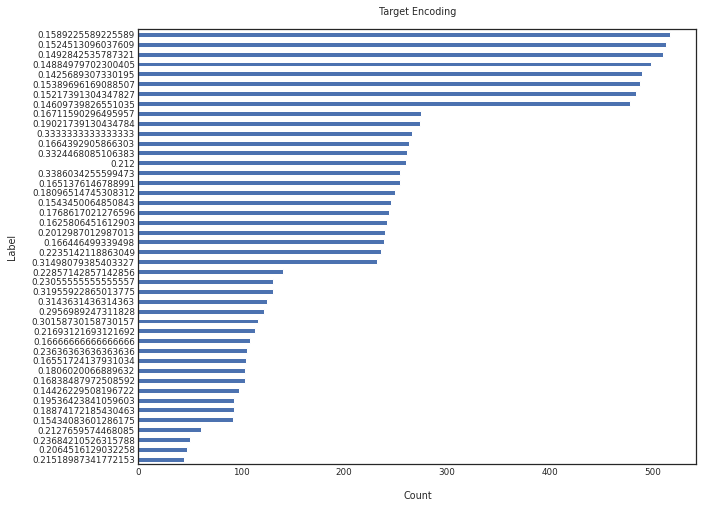

In [27]:
sns.set(font_scale=0.8)
plt.style.use('seaborn-white')
train_x['product'].value_counts().sort_values().plot(kind='barh',figsize=(10, 8))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Label", labelpad=14)
plt.title("Target Encoding", y=1.02)

In [28]:
skim(train_x)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10000  │ │ float64     │ 1     │                                    │
│ │ Number of columns │ 2      │ │ int64       │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃         ┃ missing ┃ complete rate ┃ mean ┃ sd   ┃ p0   ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ product │ 0.0     │ 1.0           │ 0.19 │ 0.06 │ 0.14 │ 0.15 │ 0.21 │ 0.34 │ █▂▂  ▂ │  │
│ │ age     │ 0.0     │ 1.0           │ 42.0 │ 22.0 │ 5.0  │ 23.0 │ 61.0 │ 79.0 │ █▇▇█▇█ │  │
│ └─────────┴─────────┴───────────────┴──────┴──────┴──────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

# Target Encoding (Version-2)

In the case of performing cross verification, it must be converted again for each fold of cross verification. This is because conversion is required again to prevent the target variable of the verification data from being included in the variable.

In [29]:
train_x, test_x = load_data()

from sklearn.model_selection import KFold

# Define the folds of cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=71)

# Looping a variable to perform target encoding
for c in cat_cols:

    # add target
    data_tmp = pd.DataFrame({c: train_x[c], 'target': train_y})
    # Prepare an array to store the values after conversion
    tmp = np.repeat(np.nan, train_x.shape[0])

    # Divide the validation data from the training data
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        # Calculating the average of the objective variable 
        # for each category on the training data
        target_mean = data_tmp.iloc[tr_idx].groupby(c)['target'].mean()
        # Storing values in temporary array after conversion 
        # for validation data
        tmp[va_idx] = train_x[c].iloc[va_idx].map(target_mean)

    # Change the original variable to the data after conversion
    train_x[c] = tmp
    print(c,"=>")
    print('-'*60)
    print(train_x[c].unique())

product =>
------------------------------------------------------------
[0.3302139  0.14741036 0.15049505 0.16494845 0.20547945 0.22911051
 0.15973597 0.32944228 0.14546685 0.22751323 0.16556291 0.19205298
 0.15813953 0.15165877 0.20475561 0.1739726  0.23717949 0.1686747
 0.30874317 0.14217687 0.16052632 0.23076923 0.14887831 0.20742638
 0.32579787 0.22068966 0.30104712 0.22077922 0.14715719 0.18253968
 0.225      0.20997375 0.16129032 0.16087516 0.16201859 0.17567568
 0.18729097 0.33333333 0.16557162 0.32692308 0.19063545 0.29459459
 0.17627119 0.16065574]


Text(0.5, 1.02, 'Target Encoding')

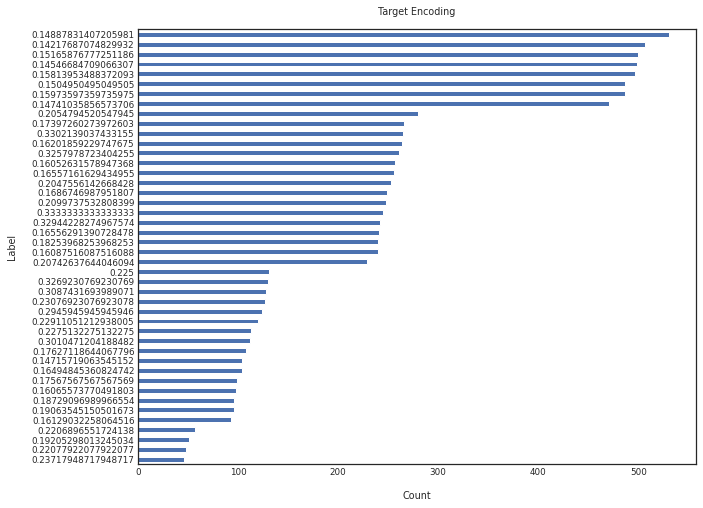

In [30]:
sns.set(font_scale=0.8)
plt.style.use('seaborn-white')
train_x['product'].value_counts().sort_values().plot(kind='barh',figsize=(10, 8))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Label", labelpad=14)
plt.title("Target Encoding", y=1.02)

In [31]:
skim(train_x)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10000  │ │ float64     │ 1     │                                    │
│ │ Number of columns │ 2      │ │ int64       │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃         ┃ missing ┃ complete rate ┃ mean ┃ sd   ┃ p0   ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ product │ 0.0     │ 1.0           │ 0.19 │ 0.06 │ 0.14 │ 0.15 │ 0.21 │ 0.33 │ █▂▁  ▂ │  │
│ │ age     │ 0.0     │ 1.0           │ 42.0 │ 22.0 │ 5.0  │ 23.0 │ 61.0 │ 79.0 │ █▇▇█▇█ │  │
│ └─────────┴─────────┴───────────────┴──────┴──────┴──────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

## Target Data Imbalance

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. We can better understand it with an example.

In [14]:
from imblearn.datasets import fetch_datasets

datasets = fetch_datasets()

# Wine quality dataset contains 12 features, descriptions found here: 
# https://archive.ics.uci.edu/ml/datasets/wine+quality
# Target class derived as target: <=4 (score between 1 and 10)
data = datasets['wine_quality']
X, y = data.data, data.target

In [15]:
y = (y==1).astype(int)

#### Visualize dataset

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dataset to 2 feature dimensions in order to visualize the data
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

fig, ax = plt.subplots(1, 2, figsize= (15,5))

ax[0].scatter(X_reduced[y == 0, 0], X_reduced[y == 0, 1], label="low quality wine", alpha=0.2)
ax[0].scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], label="high quality wine", alpha=0.2)
ax[0].set_title('PCA of original dataset')
ax[0].legend()

ax[1] = sns.countplot(y)
ax[1].set_title('Number of observations per class')

# Techniques

### Class weight

One of the simplest ways to address the class imbalance is to simply provide a weight for each class which places more emphasis on the minority classes such that the end result is a classifier which can learn equally from all classes. 

To calculate the proper weights for each class, you can use the sklearn utility function shown in the example below.
```
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', classes, y)
```

In a tree-based model where you're determining the optimal split according to some measure such as decreased entropy, you can simply scale the entropy component of each class by the corresponding weight such that you place more emphasis on the minority classes. As a reminder, the entropy of a node can be calculated as

$$ \mathop - \sum \limits_i^{}  {p_i}{\log}\left( {{p_i}} \right) $$ 

where $p_i$ is the fraction of data points within class $i$.

In a gradient-based model, you can scale the calculated loss for each observation by the appropriate class weight such that you place more significance on the losses associated with minority classes. As a reminder, a common loss function for classification is the categorical cross entropy (which is very similar to the above equation, albeit with slight differences). This may be calculated as 

 $$ -\sum_i y_i \log \hat{y}_ i $$
 
 where $y_i$ represents the true class (typically a one-hot encoded vector) and $\hat{y}_ i$ represents the predicted class distribution. 

### Oversampling
Another approach towards dealing with a class imbalance is to simply alter the dataset to remove such an imbalance. In this section, I'll discuss common techniques for *oversampling* the minority classes to increase the number of minority observations until we've reached a balanced dataset. 

#### Random oversampling
The most naive method of oversampling is to randomly sample the minority classes and simply duplicate the sampled observations. With this technique, it's important to note that you're artificially reducing the variance of the dataset. 

#### Generating new data points (oversampling)

There are two approaches supported for generating new data points, `SMOTE` (Synthetic Minority Over-sampling Technique) and `ADASYN` (Adaptive Synthetic Sampling). Both techniques use interpolation to generate new datapoints. 

For a given observation $x_i$, a new (synthetic) observation is generated by interpolating between one of the k-nearest neighbors, $x_{zi}$.

$$x_{new} = x_i + \lambda (x_{zi} - x_i)$$

where $\lambda$ is a random number in the range $\left[ {0,1} \right]$. This interpolation will create a sample on the line between $x_{i}$ and $x_{zi}$.


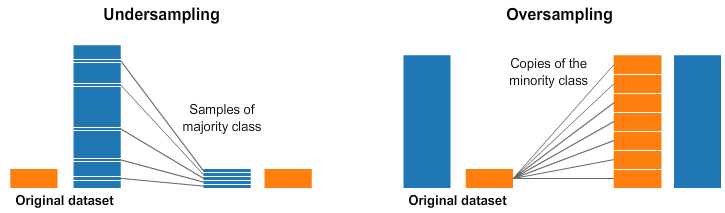

#### SMOTE
Synthetic Minority Over-sampling Technique (SMOTE) is a technique that generates new observations by interpolating between observations in the original dataset.

This algorithm has three options for selecting which observations, $x_i$, to use in generating new data points.

1. `regular`: No selection rules, randomly sample all possible $x_i$.
2. `borderline`: Separates all possible $x_i$ into three classes using the k nearest neighbors of each point.
    - *noise*: all nearest-neighbors are from a different class than $x_i$
    - *in danger*: at least half of the nearest neighbors are of the same class as $x_i$
    - *safe*: all nearest neighbors are from the same class as $x_i$
3. `svm`: Uses an SVM classifier to identify the support vectors (samples close to the decision boundary) and samples $x_i$ from these points.

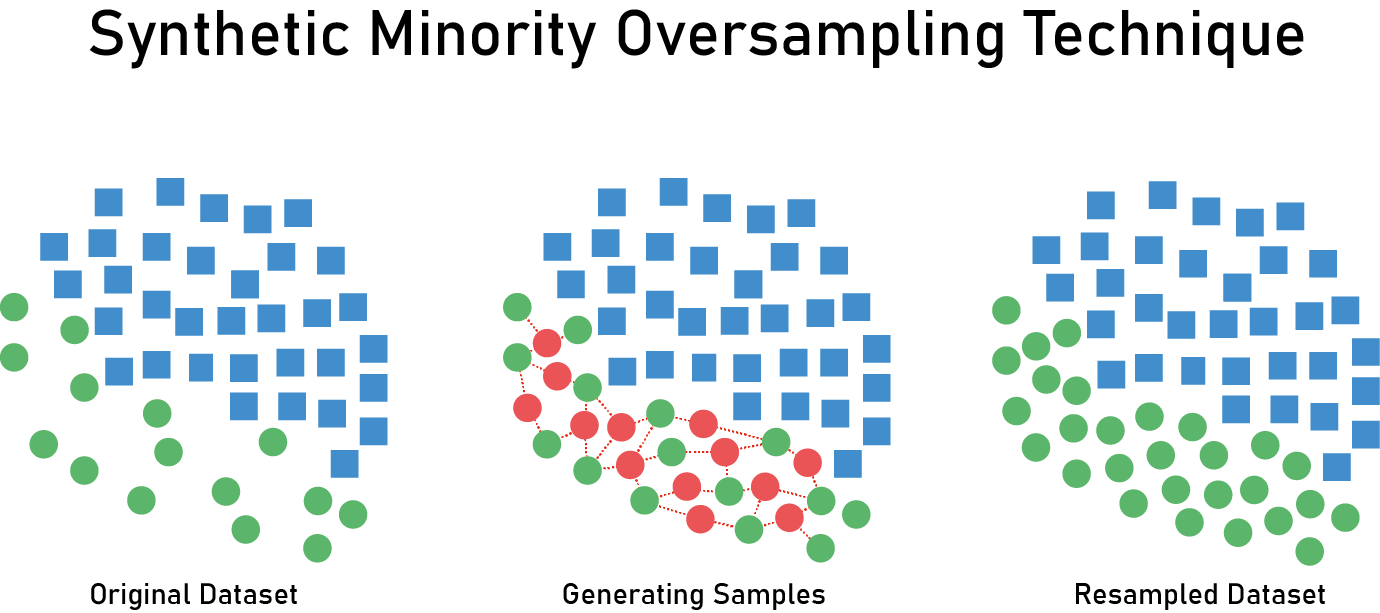

#### ADASYN
Adaptive Synthetic (ADASYN) sampling works in a similar manner as SMOTE, however, the number of samples generated for a given $x_i$ is proportional to the number of nearby samples which **do not** belong to the same class as $x_i$. Thus, ADASYN tends to focus solely on outliers when generating new synthetic training examples. 

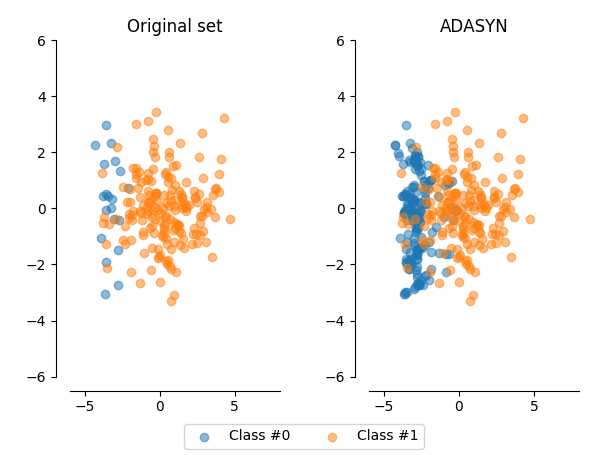

### Undersampling
Rather than oversampling the minority classes, it's also possible to achieve class balance by *undersampling* the majority class - essentially throwing away data to make it easier to learn characteristics about the minority classes.  

#### Random undersampling
As with oversampling, a naive implementation would be to simply sample the majority class at random until reaching a similar number of observations as the minority classes. For example, if your majority class has 1,000 observations and you have a minority class with 20 observations, you would collect your training data for the majority class by randomly sampling 20 observations from the original 1,000. As you might expect, this could potentially result in removing key characteristics of the majority class.

#### Near miss
The general idea behind near miss is to only the sample the points from the majority class necessary to distinguish between other classes.

**NearMiss-1** select samples from the majority class for which the average distance of the N *closest* samples of a minority class is smallest. 

**NearMiss-2** select samples from the majority class for which the average distance of the N *farthest* samples of a minority class is smallest. 


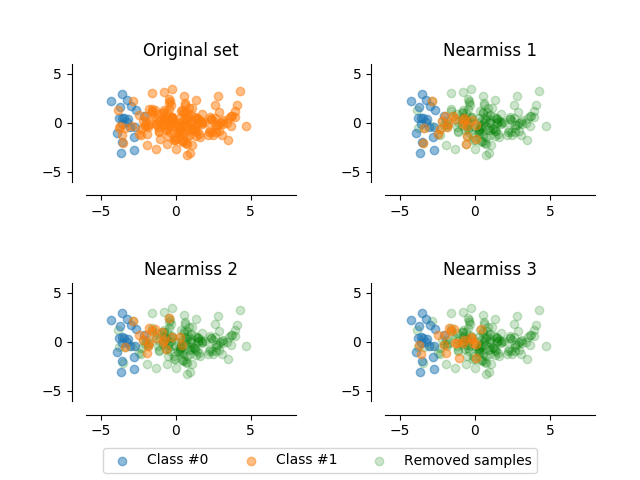

#### Tomeks links
A Tomek’s link is defined as two observations of different classes ($x$ and $y$) such that there is no example $z$ for which:

$$d(x, z) < d(x, y) \text{ or } d(y, z) < d(x, y)$$

where $d()$ is the distance between the two samples. **In other words, a Tomek’s link exists if two observations of different classes are the nearest neighbors of each other.** In the figure below, a Tomek’s link is illustrated by highlighting the samples of interest in green.


For this undersampling strategy, we'll remove any observations *from the majority class* for which a Tomek's link is identified. Depending on the dataset, this technique won't actually achieve a balance among the classes - it will simply "clean" the dataset by removing some noisy observations, which may result in an easier classification problem. 

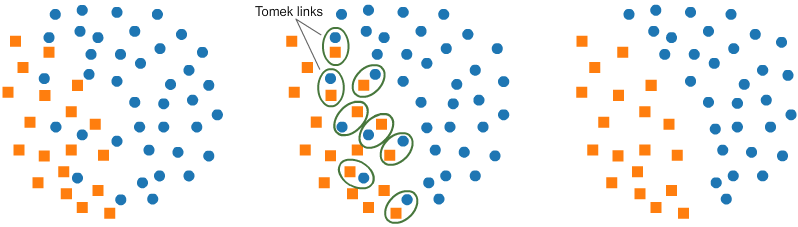